<a href="https://colab.research.google.com/github/Armin-Abdollahi/Signal-Processing/blob/main/Power_Spectral_Density_(PSD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Power Spectral Density (PSD)

Power spectral density analysis to help identify noise or unwanted frequency components

Using the MNE library to compute the Power Spectral Density (PSD) for all .gdf files in a specified folder and then saves the PSD data to a specified output folder

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 24.0 MB/s eta 0:00:00


In [3]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Define the folder containing the .gdf files
input_folder_path = '/content/drive/MyDrive/BCI_Database/gdf'

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...
Effective window size : 4.000 (s)


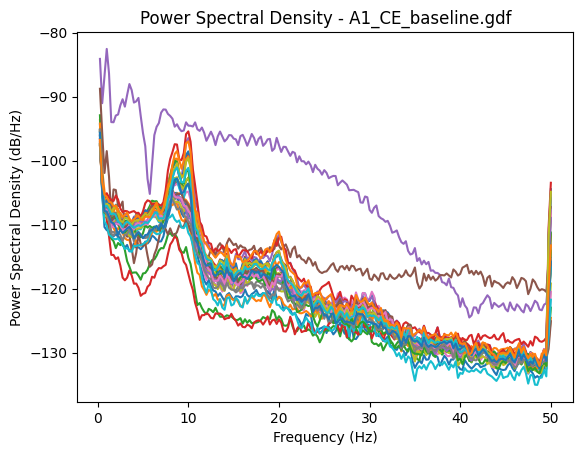

PSD plotted for A1_CE_baseline.gdf
Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/C85_R2_acquisition.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 230431  =      0.000 ...   450.061 secs...
Effective window size : 4.000 (s)


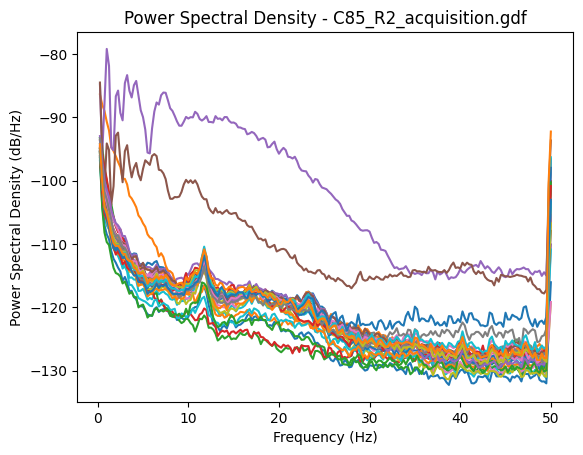

PSD plotted for C85_R2_acquisition.gdf
Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A4_R3_onlineT.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 230431  =      0.000 ...   450.061 secs...
Effective window size : 4.000 (s)


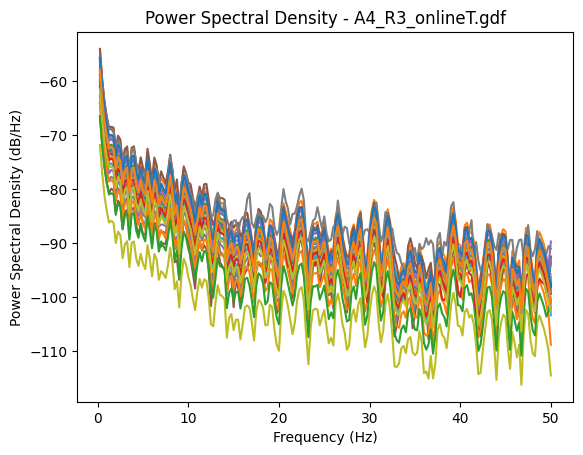

PSD plotted for A4_R3_onlineT.gdf
Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/B66_R3_onlineT.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 261599  =      0.000 ...   510.936 secs...
Effective window size : 4.000 (s)


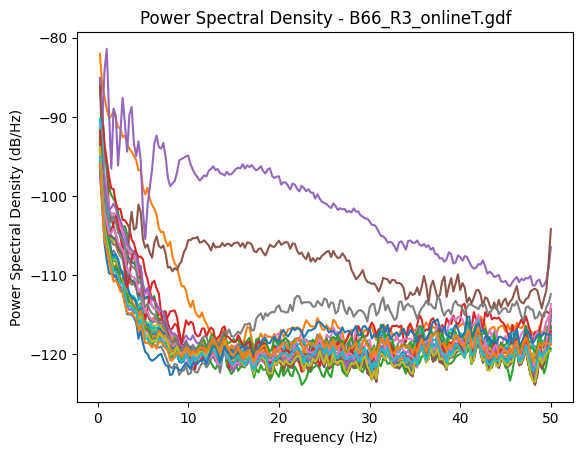

PSD plotted for B66_R3_onlineT.gdf
PSD computation and plotting complete for all .gdf files in the folder.


In [9]:
# Loop through all files in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.gdf'):
        # Construct the full file path
        file_path = os.path.join(input_folder_path, filename)

        # Load the .gdf file
        raw = mne.io.read_raw_gdf(file_path, preload=True)

        # Compute the Power Spectral Density (PSD)
        psds, freqs = raw.compute_psd(fmin=0.1, fmax=50, n_fft=2048).get_data(return_freqs=True)

        # Plot the PSD
        plt.figure()
        plt.plot(freqs, 10 * np.log10(psds.T))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Density (dB/Hz)')
        plt.title(f'Power Spectral Density - {filename}')
        plt.show()

        print(f'PSD plotted for {filename}')

print('PSD computation and plotting complete for all .gdf files in the folder.')